In [1]:
import flowpm

the mininal working example, let's check it still works with and without short range

In [2]:
%pylab inline
from flowpm import linear_field, lpt_init, nbody, cic_paint
import tensorflow as tf
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

klin = np.loadtxt('../flowpm/data/Planck15_a1p00.txt').T[0]
plin = np.loadtxt('../flowpm/data/Planck15_a1p00.txt').T[1]

ipklin = iuspline(klin, plin)

Populating the interactive namespace from numpy and matplotlib


In [3]:
stages = np.linspace(0.1, 1.0, 10, endpoint=True)
initial_conditions = flowpm.linear_field(16,#32,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=1,seed=1)
initial_conditions32 = flowpm.linear_field(32,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=1,seed=1)

# Sample particles
state = flowpm.lpt_init(initial_conditions, a0=0.1)   
state32 = flowpm.lpt_init(initial_conditions32, a0=0.1)   


# # # Evolve particles down to z=0
nc=32
#final_state = flowpm.nbody(state, stages, 16 ,short_range=False,split=0)    
# final_state2 = flowpm.nbody(state, stages, 16, short_range=False,pm_nc_factor=2,split=0)         
# final_state16 = flowpm.nbody(state, stages, 16, short_range=False,pm_nc_factor=16,split=0) 
# nc=32
# final_state = flowpm.nbody(state32, stages, 32 ,short_range=False)    
# final_state2 = flowpm.nbody(state32, stages, 32, short_range=False,pm_nc_factor=2)         
# final_state4 = flowpm.nbody(state32, stages, 32, short_range=False,pm_nc_factor=4)         

# final_state32 = flowpm.nbody(state32, stages, 32,short_range=False)         


# # # Retrieve final density field
#final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])
# final_field2 = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state2[0])
# final_field16 = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state16[0])
# final_field32 = flowpm.cic_paint(tf.zeros_like(initial_conditions32), final_state32[0])

#with tf.Session() as sess:
#     state_l = sess.run(final_state)
#     sim_l = sess.run(final_field)
#     state_l2 = sess.run(final_state2)
#     sim_l2 = sess.run(final_field2)
#     state_l4 = sess.run(final_state4)
#     sim_l4 = sess.run(final_field4)
#     state_l16 = sess.run(final_state16)
#     sim_l16 = sess.run(final_field16)
#     state_l32 = sess.run(final_state32)
#     sim_l32 = sess.run(final_field32)


No handles with labels found to put in legend.


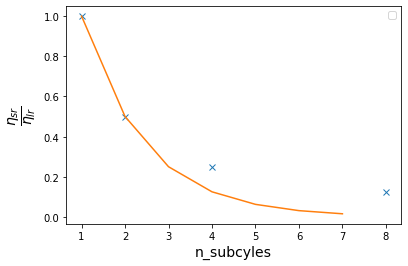

In [37]:
plt.figure()
plt.plot([1,2,4,8],[1,0.83/1.66,1.04/4.17,0.73/5.83],ls=' ',marker='x')
plt.plot(np.arange(1,8),(2.**-np.arange(1,8))*2)#,label='2^N')
#plt.plot([1,2,4,8],[1,2.46/4.93,0.63/2.53,0.16/1.28])
plt.xlabel('n_subcyles')
plt.ylabel(r'$\frac{\eta_{sr}}{\eta_{lr}}$',fontsize=20)
plt.legend()
plt.show()

Text(0, 0.5, '$\\rm{time} \\ (\\rm{ms})$')

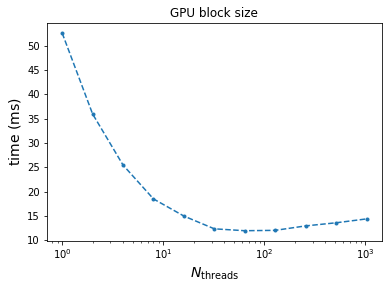

In [67]:
gpu_blks = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

gpu_times = np.array([0.0526399,
0.0359843,
0.025465,
0.0184962,
0.0149686,
0.0123429,
0.0119539,
0.0120291,
0.0129453,
0.013586,
0.0143852,
])*1e3

plt.plot(gpu_blks,gpu_times,ls='--',marker='.')
plt.xscale('log')
plt.title("GPU block size")
plt.xlabel(r'$N_{\rm{threads}}$')
plt.ylabel(r'$\rm{time} \ (\rm{ms})$')

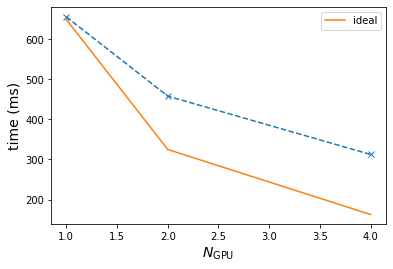

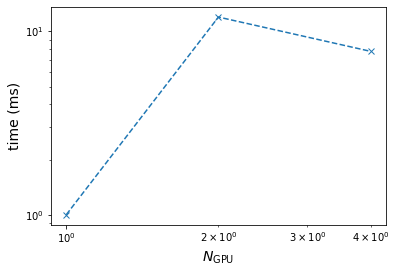

In [100]:
ps=np.array([1,2,4])
ts_s = np.array([0.31256294902414083,
0.45834233693312854,
0.6564302189508453])[::-1]*1e3
ts_w =np.array([0.17584074893966317,
0.13523117499426007,
0.005652692983858287])[::-1]*1e3

plt.plot(ps,ts_s,marker='x',ls='--')
plt.plot(ps,1e3*np.array([1,1/2,1/4])*.65,marker='',ls='-',label='ideal')
plt.xlabel(r'$N_{\rm{GPU}}$')
plt.ylabel('time (ms)')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

plt.plot(ps,ts_w/ts_w[0]/ps,marker='x',ls='--')
plt.xlabel(r'$N_{\rm{GPU}}$')
plt.ylabel('time (ms)')
plt.xscale('log')
plt.yscale('log')

In [53]:
ps = np.array([8,16,32,64])
py = np.array([7.69,15.7,60+35,10*60+32])*1e3
cpu = np.array([0.00554019,
0.045885,
0.334447,
2.67725])*1e3
gpu = np.array([0.00247457,0.00280416,0.00415305,0.0130069])*1e3

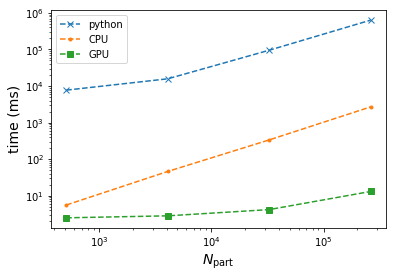

In [68]:

plt.figure()
plt.plot(ps**3,py,label='python',ls='--',marker='x')
plt.plot(ps**3,cpu,label='CPU',ls='--',marker='.')
plt.plot(ps**3,gpu,label='GPU',ls='--',marker='s')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N_{\rm{part}}$')
plt.ylabel('time (ms)')
plt.show()

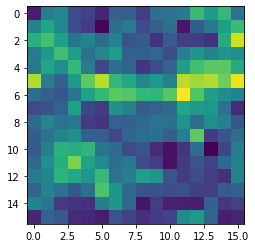

In [42]:
imshow(sim_l16[0].sum(axis=0))

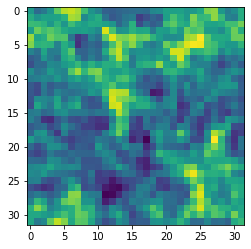

In [38]:
imshow(sim_l4[0].sum(axis=0))

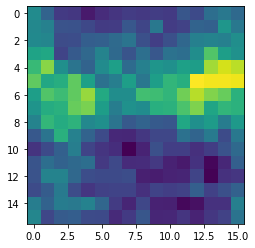

In [7]:
#visually comparing one-step fields
imshow(sim_s[0].sum(axis=0))
plt.show()

split = 1


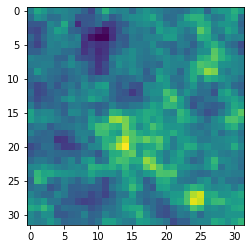

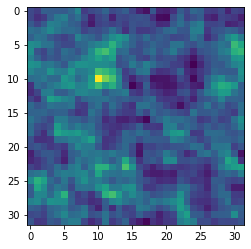

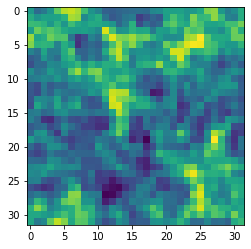

In [33]:
imshow(sim_l[0].mean(axis=0))
plt.show()
imshow(sim_l2[0].mean(axis=0))
plt.show()
imshow(sim_l4[0].mean(axis=0))
plt.show()


In [25]:
print(state_l.shape)

(3, 1, 32768, 3)


In [ ]:
print()

In [ ]:
#all for 16, fiducial params
init_n2 = [3.62,0.01] #eta, zeta, shared
eta_n2 =[[1.66,0.83],[1.03,0.52],[0.83,0.41],[0.82,0.41],[0.79,0.39],[0.69,0.34],[0.94,0.47],[1.00,0.50]] #LR, SR pairs
zeta_n2 = [[4.93,2.46],[4.94,2.47],[4.94,2.47],[4.94,2.47],[4.93,2.46]]
eta_n4 = [[4.17,1.04],[1.96,0.49],[2.11,0.53],[1.80,0.45],[4.66,1.17],[3.47,0.87],[1.09,0.27],[0.64,0.16] [8.45,2.11][4.90,1.22]    ,[0.81,0.20]   [7.11,1.78],[5.93,1.48], [7.31,1.83]]
zeta_n4 = [[2.53,0.63],4[2.53,0.63],[2.72,0.68],[],[]] 4[2.69,0.67]

In [14]:
#Try the short range
# Evolve particles down to z=0
final_state_s = flowpm.nbody(state32, stages, 32,short_range=True,cm_scale=2,eps_s=.1,nsubcycles = 2,split=1)         

# Retrieve final density field
final_field_s = flowpm.cic_paint(tf.zeros_like(initial_conditions32), final_state_s[0])

with tf.Session() as sess:
    #state_s= sess.run(final_state_s)
    #sim_s= sess.run(final_field_s)
    state_s322= sess.run(final_state_s)
    sim_s322= sess.run(final_field_s)


dbug max LR force is 0.17795315
min x=31.444095611572266, max x=-0.4145595133304596
Post mod (what SR sees) min x=31.999975204467773, max x=0.0001735081896185875
global max eta for default timestep is 1.67, and for sr timestep is 1.67
global max zeta for default timestep is 0.01 and for sr timestep is 0.01
bin distr summary (for rough idea of load balance): min=1, max=26, mean=8.00, median=8.0, total/expected_total=1.0
dbug max SR force is 444.17764
in short range
substages [0.1  0.15 0.2 ]
subcycling: step=1 of 2
beginning - x_sr=0.100,p_sr=0.141,f_sr=0.100
min x=128.6896514892578, max x=-116.4406967163086
Post mod (what SR sees) min x=31.99991798400879, max x=0.00019612512551248074
global max eta for default timestep is 3.85, and for sr timestep is 1.92
global max zeta for default timestep is 3.06 and for sr timestep is 1.53
bin distr summary (for rough idea of load balance): min=0, max=31, mean=8.00, median=8.0, total/expected_total=1.0
dbug max SR force is 278.9789
end - x_sr=0.150

KeyboardInterrupt: 

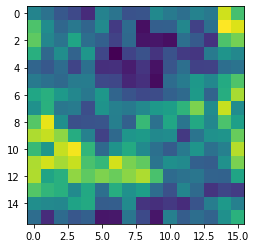

In [11]:
imshow(sim_s8[0].sum(axis=0))


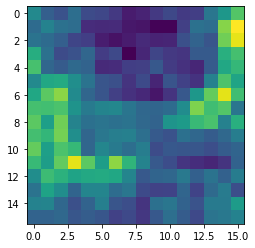

In [9]:
imshow(sim_s4[0].sum(axis=0))


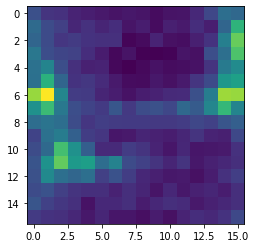

In [5]:
#visually comparing one-step fields
imshow(sim_s[0].sum(axis=0))
plt.show()



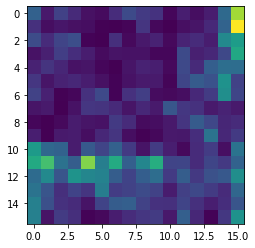

In [6]:
#visually comparing one-step fields
imshow(sim_s[0,0])
plt.show()

#this is split =2


In [7]:
imshow(sim_l[0].sum(axis=0))
plt.show()

imshow(sim_l32[0].sum(axis=0))
plt.show()

#L2 MSE
l2mse = np.sqrt(((sim_l[0]-sim_s[0])**2))
imshow(l2mse.sum(axis=0))
print(l2mse.max(),l2mse.min())
plt.show()

#pretty awful, looks like it just subtracting uniform background
#no it is slightly better than that, it looks more like  subtracting a diffused version of the long-range
#the diffusion is occuring because of the 2-body interaction time from high accelerations due to nearby particles
#because timestep is too short...

NameError: name 'sim_l' is not defined

In [6]:
%%time
LL = []
for i in range(8**3):
    LL.append(5)
    

CPU times: user 67 µs, sys: 0 ns, total: 67 µs
Wall time: 70.8 µs


In [7]:
def speed_check():
    LL = []
    for i in range(8**3):
        LL.append(tf.constant([5]))
        
    return LL

In [8]:
%%time
with tf.Session() as sess:
    ll = sess.run(speed_check())
    

CPU times: user 1.11 s, sys: 27 ms, total: 1.13 s
Wall time: 1.14 s


In [ ]:
#calling tensorflow in the loops is a big problem...